In [270]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [279]:
# given data we want to fit
experiment = {"time":[0, 0.1, 0.2, 0.4, 0.8, 1], "y":[2.0081,  1.5512,  1.1903,  0.7160,  0.2562,  0.1495]}

In [317]:

def fitfunc(t, k):
    'Function that returns Ca computed from an ODE for a k'

    # initial condition

    y0 = [experiment["y"][0]]

    # Using odeint

    def forOdeint(y, t):
        dydt = -k * y
        return dydt
        
    #y = odeint(forOdeint, y0, t).T[0]

    # Using solve_ivp

    def forSolve_ivp(t, y):
        dydt = -k * y
        return dydt

    tspan = [0, 1] # from t=0 to t=1
    Casol = solve_ivp(forSolve_ivp, tspan, y0, t_eval = t)
    y = Casol.y[0]
    
    return y

In [318]:

k_fit, kcov = curve_fit(fitfunc, experiment["time"], experiment["y"], p0=[1])
print(f"k_fit: {k_fit}")
tfit = np.linspace(0,1,6)
fit = fitfunc(tfit, k_fit)

k_fit: [2.5890218]


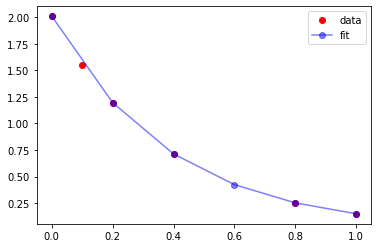

In [294]:
plt.plot(tspan, Ca_data, 'ro', label='data')
plt.plot(tfit, fit, 'bo-', label='fit', alpha=0.5)
plt.legend(loc='best')
